# Đồ án cuối kì: Time Series Clustering

# Thành viên Nhóm
- 19110311 - Nguyễn Ngô Trung Hậu.
- 19110315 - Trịnh Ngọc Hiến

In [ ]:
!pip install -q umap-learn

     |████████████████████████████████| 88 kB 3.8 MB/s 
     |████████████████████████████████| 1.1 MB 20.7 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE

# Truy Xuất File:

## Hàm truy xuất file:

In [ ]:
def truyxuat_file(i):
  t = open ( str(i)+'.txt' , 'r')
  l = []
  h = []
  l = [ line.split() for line in t]
  x = np.array(l)
  for i in x:
    h.append(i.astype(float))
  h = np.array(h)
  return h

## Truy xuất file:

In [ ]:
t = range(1,840)
sum_file=[]
for i in t:
  sum_file.append(truyxuat_file(i))

sum_file = np.array(sum_file)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
print(sum_file[1])

[[26. 51. 36.]
 [26. 51. 36.]
 [26. 51. 37.]
 ...
 [16. 44. 39.]
 [15. 42. 38.]
 [14. 41. 38.]]


In [ ]:
print(sum_file[0][:,1].shape)

(2167,)


In [ ]:
sum_shape = []
for i in sum_file:
  sum_shape.append(i.shape[0])

In [ ]:
print(sum_shape)

[2167, 844, 2228, 2163, 3199, 2777, 3021, 2472, 2497, 2965, 3150, 2346, 270, 270, 270, 270, 270, 270, 195, 539, 447, 492, 423, 405, 431, 419, 463, 351, 356, 442, 458, 270, 433, 530, 457, 414, 459, 427, 431, 435, 370, 448, 335, 431, 293, 440, 301, 166, 216, 382, 378, 342, 555, 508, 805, 524, 443, 465, 518, 486, 407, 401, 480, 412, 455, 417, 406, 394, 417, 378, 385, 386, 361, 416, 377, 400, 380, 428, 400, 404, 438, 454, 464, 380, 366, 419, 388, 385, 302, 453, 364, 425, 357, 473, 408, 306, 283, 395, 280, 287, 253, 380, 255, 346, 273, 368, 359, 478, 384, 451, 377, 456, 392, 452, 833, 737, 818, 1282, 922, 767, 939, 742, 637, 1010, 719, 813, 840, 884, 833, 677, 636, 777, 812, 675, 403, 643, 584, 571, 587, 734, 682, 806, 753, 811, 577, 594, 534, 448, 468, 310, 297, 256, 287, 415, 409, 380, 390, 381, 404, 366, 358, 379, 507, 426, 361, 353, 386, 429, 332, 359, 429, 353, 385, 379, 356, 359, 372, 304, 444, 334, 347, 256, 348, 234, 156, 190, 300, 562, 818, 538, 656, 427, 270, 495, 348, 270, 405, 2

- Tìm độ dài lớn nhất trong tất cả các file dataset.

In [ ]:
print(np.max(sum_shape))

9318


In [ ]:
data = []
for i in range(0,len(sum_file)):
  for j in range(0,3):
    data.append(sum_file[i][:,j])
data = np.array(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


In [ ]:
print(data.shape)

(2517,)


In [ ]:
sub_shape = []
for i in sum_shape:
  sub_shape.append(abs(9320-i))

In [ ]:
print(sub_shape)

[7153, 8476, 7092, 7157, 6121, 6543, 6299, 6848, 6823, 6355, 6170, 6974, 9050, 9050, 9050, 9050, 9050, 9050, 9125, 8781, 8873, 8828, 8897, 8915, 8889, 8901, 8857, 8969, 8964, 8878, 8862, 9050, 8887, 8790, 8863, 8906, 8861, 8893, 8889, 8885, 8950, 8872, 8985, 8889, 9027, 8880, 9019, 9154, 9104, 8938, 8942, 8978, 8765, 8812, 8515, 8796, 8877, 8855, 8802, 8834, 8913, 8919, 8840, 8908, 8865, 8903, 8914, 8926, 8903, 8942, 8935, 8934, 8959, 8904, 8943, 8920, 8940, 8892, 8920, 8916, 8882, 8866, 8856, 8940, 8954, 8901, 8932, 8935, 9018, 8867, 8956, 8895, 8963, 8847, 8912, 9014, 9037, 8925, 9040, 9033, 9067, 8940, 9065, 8974, 9047, 8952, 8961, 8842, 8936, 8869, 8943, 8864, 8928, 8868, 8487, 8583, 8502, 8038, 8398, 8553, 8381, 8578, 8683, 8310, 8601, 8507, 8480, 8436, 8487, 8643, 8684, 8543, 8508, 8645, 8917, 8677, 8736, 8749, 8733, 8586, 8638, 8514, 8567, 8509, 8743, 8726, 8786, 8872, 8852, 9010, 9023, 9064, 9033, 8905, 8911, 8940, 8930, 8939, 8916, 8954, 8962, 8941, 8813, 8894, 8959, 8967, 893

#Biến đổi Fourier:

## Hàm ngoại suy Fourier:

In [ ]:
from numpy import fft

def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

## Hàm chuyển đổi Fourier:

In [ ]:
def fourierTranform(x, y):
  sum = []
  for i in range(0, len(y)):
    for j in range(0, len(x)):
      if j % 3 != 0 or j == 0:
        sum.append(fourierExtrapolation(x[j], y[i]))
      if j > 0 and j % 3 == 0:
        i = i + 1
        if i > len(y):
          break
        sum.append(fourierExtrapolation(x[j], y[i]))
    break

  return sum

In [ ]:
sum_1 = []
sum_1 = fourierTranform(data, sub_shape)

In [ ]:
sum_1 = np.array(sum_1)
print(sum_1.shape)

(2517, 9320)


- Đưa các dataset được biến đổi gộp chung thành 1 dataset.

In [ ]:
dataset = []
for i in range(0,len(sum_1)):
  if i %3 ==0:
    dataset.append(sum_1[i:i+3].flatten())
dataset = np.array(dataset)

In [ ]:
print(dataset.shape)

(839, 27960)


In [ ]:
df = pd.DataFrame(data = dataset)
print(df)

         0          1          2          3          4          5      \
0    22.416569  22.422809  22.429138  22.435544  22.442018  22.448548   
1    22.870217  22.872536  22.870620  22.864380  22.853754  22.838705   
2    21.489951  21.497420  21.507556  21.520349  21.535785  21.553852   
3    23.159227  23.205035  23.253033  23.303181  23.355436  23.409754   
4    21.458255  21.474582  21.492182  21.511052  21.531189  21.552592   
..         ...        ...        ...        ...        ...        ...   
834  33.013486  32.765037  32.489065  32.186355  31.857759  31.504194   
835  35.053323  34.913129  34.745871  34.551956  34.331851  34.086079   
836  44.918481  44.705415  44.466087  44.200907  43.910327  43.594844   
837  35.639005  35.605977  35.545692  35.458278  35.343926  35.202883   
838  30.480554  30.314489  30.125736  29.914765  29.682096  29.428297   

         6          7          8          9      ...      27950      27951  \
0    22.455124  22.461735  22.468371  22.4750

# Các thuật toán giảm số chiều:

##PCA

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
df_PCA = pd.DataFrame(data = pca_result[:, 1],columns = ['PCA_1'] )
df_PCA['PCA_2'] = pca_result[:, 1]
print(f'Explained var: {pca.explained_variance_ratio_}')
df_PCA.shape

Explained var: [0.89357876 0.06763347]


(839, 2)

In [ ]:
print(df_PCA)

           PCA_1        PCA_2
0    -233.189806  -233.189806
1    1390.061103  1390.061103
2   -1878.269524 -1878.269524
3   -2414.841006 -2414.841006
4    -630.742437  -630.742437
..           ...          ...
834   402.896307   402.896307
835   673.080269   673.080269
836   308.153395   308.153395
837   139.696920   139.696920
838   117.371560   117.371560

[839 rows x 2 columns]


Text(0.5, 1.0, 'PCA of time series')

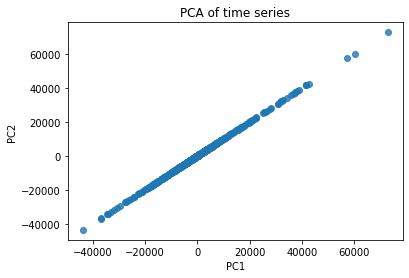

In [ ]:
plt.figure()
plt.scatter(df_PCA['PCA_1'],df_PCA['PCA_2'], alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA of time series")

##t-SNE

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30)
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(df)
df_SNE = pd.DataFrame(data = tsne_result[:, 0],columns = ['t-SNE_1'] )
df_SNE['t-SNE_2'] = tsne_result[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Text(0.5, 1.0, 't-SNE of time series')

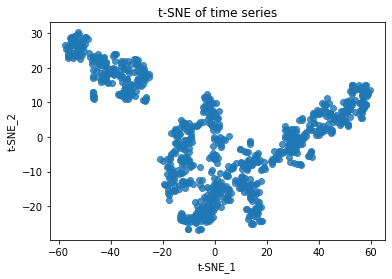

In [ ]:
plt.figure()
plt.scatter(df_SNE['t-SNE_1'],df_SNE['t-SNE_2'], alpha=0.8)
plt.xlabel('t-SNE_1')
plt.ylabel('t-SNE_2')
plt.title("t-SNE of time series")

## UMAP

In [ ]:
from umap import UMAP

umap_reducer = UMAP()
umap_result = umap_reducer.fit_transform(df)
df_UMAP = pd.DataFrame(data = umap_result[:, 0],columns = ['UMAP_1'] )
df_UMAP['UMAP_2'] = umap_result[:, 1]

Text(0.5, 1.0, 'UMAP of time series')

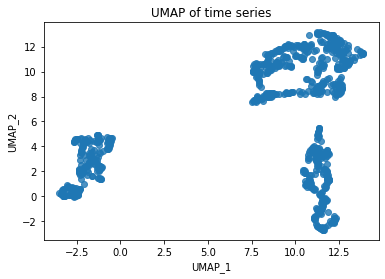

In [ ]:
plt.figure()
plt.scatter(df_UMAP['UMAP_1'],df_UMAP['UMAP_2'], alpha=0.8)
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.title("UMAP of time series")

# K-Means

In [ ]:
labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
print(len(labels))

839


##K-means theo PCA

In [ ]:
X =  df_PCA[["PCA_1", "PCA_2"]].values

In [ ]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=14)
Kmean = Kmean.fit(X)
clusters = Kmean.labels_
print(clusters)

[ 5  5 11 11  5 11  5 11 11 11 11 11 10  5 10  5 10 10 11  5  5 10 10 10
  5  5  5 13  6 11  5  1  5  0  1  5  5 10 10 10  5  5 10  5  5 10  1 10
  0 10 10 11  5  5  5  5  5  0  5  7 10 10 10 11 10  5 11  5 11 11  0  1
  5  5 10 10  7  5  5 10  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5 10
  5  5 10  5  5  5  5 11  5  5  5  5  5 11 11  5 11  5 11 11  5  5  5  5
 11 11  1  5  5 11  5 11  5  5 11  5 10  5  6  5 11  5  5 11 10 10 10  5
 10  5  5 10  5 11 11  7 11  5 10  1 10  0  5  5 10 10 11 10  5 11  5 10
  1  5  5  5 10 10 10 10  5  1 10  5 11 11  5 11  6  0 10  0 11 10  1  7
  6 11  7 10  5  0 10 10 11  5 10  1  5  1 11  0 10 13  5 11 11 10  1  5
  5  0 11 11  0 10  5 11 11  7 10  7 10  1 11  1  5 10  0 11 10  6  4 10
  5 11 10 10  0  0  5  5 10 11  1  3  5  1  5  5  0  5 10 13  1  0  3 13
  5 11  5 10 11  0  5 10 11  5 10  5 10  1  5  5 10  5 10  1  5  1  1  5
  5  5  5  5  5  5  5 13  7 10  2  0  9 11 11  1  1  5  1 11  5  1 10 13
 10  6  1  3  1 12  3 12  3  1  9  9  4  9  9 11 13

- Kiểm tra tính chính xác của thuật toán khi giảm số chiều bằng PCA.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(labels, clusters)

0.06436233611442194

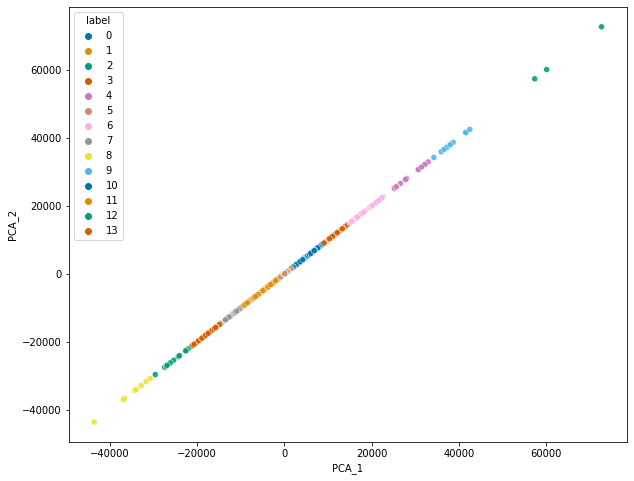

In [ ]:
df_PCA['label'] = clusters
plt.figure(figsize=(10,8))
sns.scatterplot(
    x=f'PCA_1', y=f'PCA_2',
    hue="label",
    palette=sns.color_palette("colorblind", 14),
    data=df_PCA,
    legend="full",
    alpha=0.9
)

## K-Means theo t-SNE

In [ ]:
X_SNE =  df_SNE[["t-SNE_1", "t-SNE_2"]].values

In [ ]:
Kmean_SNE = Kmean.fit(X_SNE)
clusters_SNE = Kmean_SNE.labels_
print(clusters_SNE)

[12  2 10 10 12 10 12 10 10 10 10 10  7  2 13  2 13 13  1 12  6  6  6  6
  6  6  2  1  6  6  6  1  6  6 11  6  6  6  6  6  6  6  1  6  6  6  1  5
  5  6  6 10  2 12  2  2  2 13 13  6 13 13  7 12  8 12  6  6  6  1  8 12
 12 12 13 13 11  2 13 13  2  2 13 13 13 13 13  2 13 13 13 13  2  2  2  7
  2 12 13  2 13  2 13 10 13 12  6 12 12  6  1 12  6  6  4  4  4 12  2 12
 10  4  4  4  4  4  4  4  8  4  2  4  8 12  8  6 10  2  4  4  7  8  7 12
  8  6  6  7  6  6 10  1  6  6  6  6  6  6  6  6  6  6 12 13  6  6  6  6
  1  1  6  6  6  6  6  6  6  1  1  1  6  1  6  1  5  5  1  7 10 10  4 11
  6  4 11  8  8  6  7  8 10  7  0  0  8  4  4  6  8  8  8  4 10  7 11  8
  8  8  4  4  7  8  8  4  4 11  8 11  8 11  4  4  8  8  8 10  6  6  6  7
 12  4  8 13  8  6  4 12  7  4 11 11 12 11  6  8  8 12  7  8 11  8 11  7
  4  4  4  8  4  7 12  8  4 12  8  8  8  4  7 12  8  8  8 11  8  4  4 12
 12 12 12 12 12 12 12  8  0  0  9  3  3  0  0  0  0  9  0  0  0  0  9  3
  9  3  0  0  0  0  0  0  0  0  9  9  9  9  9  9  9

In [ ]:
df_SNE['label'] = clusters_SNE
df_SNE.head()

,t-SNE_1,t-SNE_2,label
0,7.864277,-13.169011,12
1,-5.709972,-13.952556,2
2,-0.389404,-5.251549,10
3,-0.515525,-4.483864,10
4,7.718783,-12.497040,12


- Kiểm tra tính chính xác của thuật toán khi giảm số chiều bằng t-SNE.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(labels, clusters_SNE)

0.07985697258641239

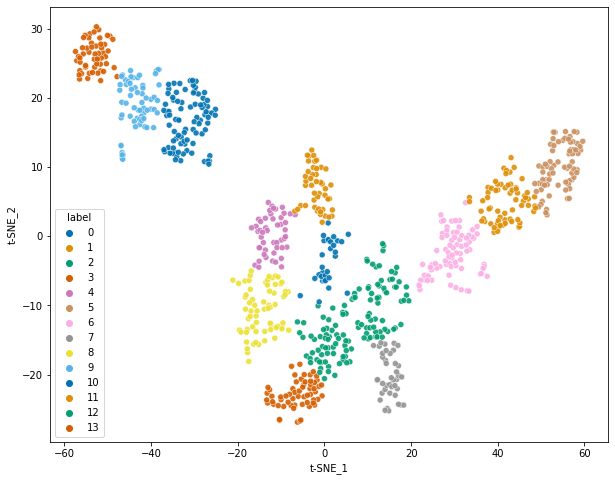

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x=f't-SNE_1', y=f't-SNE_2',
    hue="label",
    palette=sns.color_palette("colorblind", 14),
    data=df_SNE,
    legend="full",
    alpha=0.9
)

## K-Means theo UMAP

In [ ]:
X_UMAP =  df_UMAP[["UMAP_1", "UMAP_2"]].values

In [ ]:
Kmean_UMAP = Kmean.fit(X_UMAP)
clusters_UMAP = Kmean_UMAP.labels_
print(clusters_UMAP)

[12 10 10 10 12 10 12 10 10 10 10 10  3 10  7 10  7  7  9 12  2  2  2  2
  2  2 10  9  9  2  2  9  2  2  6  2  2  2  2  2  2  2  9  2  2  9  9 13
 13  9  2 10 10  1 10 10 10  7  7  2  7  7  3  1  3  1  2  2  2  9  3  1
  1  1  7  7  6  1  7  7 10 10  7  7  7  7  7 10  7  7  7  7 10 10 10  7
 10  1  7 10  7 10  7 10  7  1  2  1  1  2  9  1  2  2 11 11 11 12 10  1
 10 11 11 11 11 11 11 11 11 11 10 11  3 12  3  2  6 10 11 11  3  3 12 12
  3  2  2  3  2  2  6  9  9  2  2  2  2  2  2  2  2  2  1  7  2  2  2  2
  9  9  2  2  2  2  2  2  2  9  9  9  2  9  2  9 13 13  9  3  6  1 11  6
  2 11  6 11 11  2 12  3  6 12  0  0 11 11 11  2  3  3 11 11  6  3  6 11
 11  3 11 11  3 11 11 11 11  6  3  6  3  6 11 11  3  3  3  6  2  2  2  3
 12 11 11  7  3  2 11 12  3 11  6  6 12  6  2 11  3 12 12  3 11  3  6  3
 11 11 11  3 11  3 12  3 11 12  3  3  3 11 12 12  3 11 11  6 11 11 11 12
 12 12 12 12 12 12 12  7  0  0  8  5  5  0  0  0  0  8  0  0  0  0  8  8
  8  5  0  0  0  0  0  0  0  0  8  8  8  8  8  8  8

- Kiểm tra tính chính xác của thuật toán khi giảm số chiều bằng UMAP.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(labels, clusters_UMAP)

0.025029797377830752

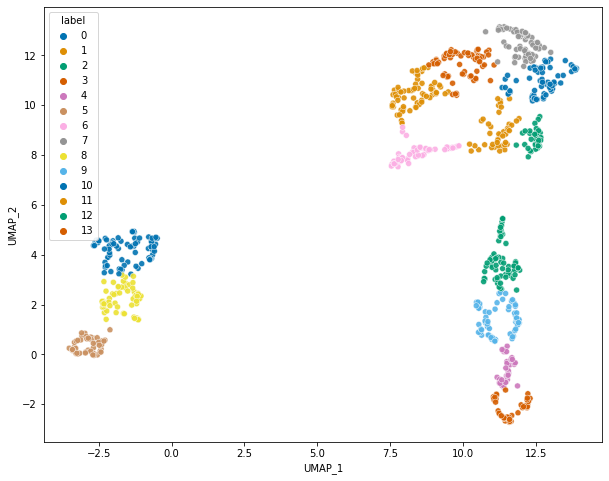

In [ ]:
df_UMAP['label'] = clusters_UMAP
df_UMAP.head()
plt.figure(figsize=(10,8))
sns.scatterplot(
    x=f'UMAP_1', y=f'UMAP_2',
    hue="label",
    palette=sns.color_palette("colorblind", 14),
    data=df_UMAP,
    legend="full",
    alpha=0.9
)